        Data Science: A Programming Approach
        Manasa Gonuguntla
        University of Texas Arlington
        11/15/2022

<h1 align='center' style="color: purple;">Individual Project - Fashion DataSet</h1>

### Project Overview: Fashion MNIST Dataset

I am working on a project using the popular Fashion MNIST dataset, which includes tiny images of various fashion items. Here is a step-by-step explanation of what I did:

1. **Data Loading:**
   - Loaded the Fashion MNIST dataset.

2. **Data Preparation:**
   - Saved the data into two CSV files to facilitate processing in chunks.
   - Divided the data into 10 chunks for more manageable processing.

3. **Initial Model Application:**
   - Applied various machine learning models to the entire dataset without performing any dimensionality reduction.

4. **Dimensionality Reduction:**
   - Used Principal Component Analysis (PCA) to reduce the dimensionality of the dataset from 784 features to 144 features.

5. **Model Application after Dimensionality Reduction:**
   - Applied the same machine learning models to the dimensionally reduced data.

6. **Model Evaluation:**
   - Printed the confusion matrices for each model to evaluate their performance.
   - Identified that the Random Forest classifier performed the best among all the models tested.

7. **Testing on Custom Fashion Items:**
   - Conducted tests using my own fashion items to further validate the model's performance.

In conclusion, the Random Forest classifier demonstrated superior performance compared to other models, both before and after dimensionality reduction.


### Loading the Dataset

In this step, we will load the Fashion MNIST dataset. The dataset consists of 60,000 training images and 10,000 test images, each being a 28x28 grayscale image of various fashion items. We will use the `keras.datasets` module to load the data.


In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Checking for Missing Values

After dividing the dataset into training and test sets, we need to ensure that there are no missing values in our data. Missing values can negatively impact the performance of our machine learning models.

Let's take a look at the `train_images`, `train_labels`, `test_images`, and `test_labels` to check if there are any missing values.

In [3]:
# Check for missing values in the training and test sets
missing_train_images = np.sum(np.isnan(X_train))
missing_train_labels = np.sum(np.isnan(X_test))
missing_test_images = np.sum(np.isnan(y_train))
missing_test_labels = np.sum(np.isnan(y_test))

print(f"Missing values in training images: {missing_train_images}")
print(f"Missing values in training labels: {missing_train_labels}")
print(f"Missing values in test images: {missing_test_images}")
print(f"Missing values in test labels: {missing_test_labels}")

Missing values in training images: 0
Missing values in training labels: 0
Missing values in test images: 0
Missing values in test labels: 0


### Data Visualization

Now it is clear that the training dataset (train_images) contains 60,000 images, each of size 28x28 and no missing values. To understand the data better, we can visualize these images.

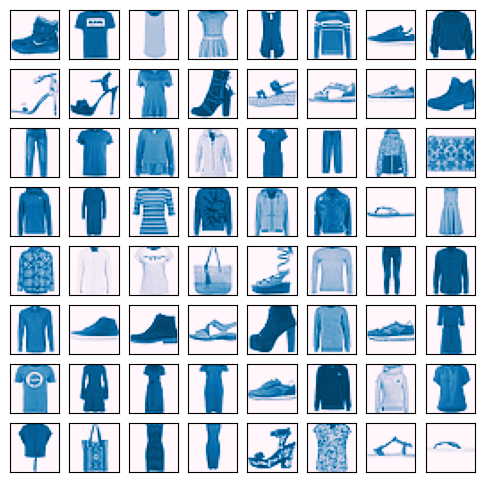

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(8, 8, figsize=(6, 6)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i], cmap='PuBu')
    axi.set(xticks=[], yticks=[])

(10000, 28, 28)


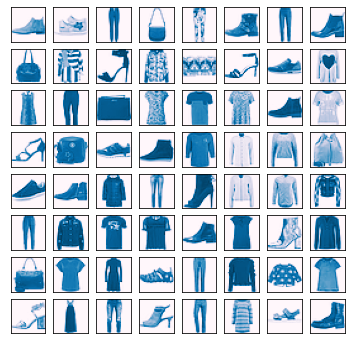

In [7]:
print(X_test.shape)
fig, ax = plt.subplots(8, 8, figsize=(6, 6)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[-i], cmap='PuBu')
    axi.set(xticks=[], yticks=[])

I explored the effect of converting a grayscale image from the dataset to RGB. This was done to examine whether the images would display in color after conversion.

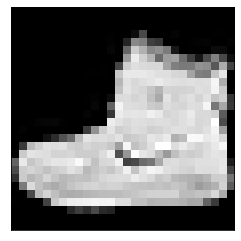

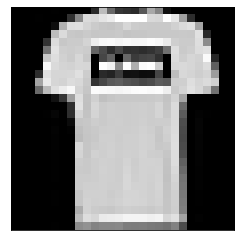

In [8]:
import numpy as np
from PIL import Image
for i in range(2):
    a_sample_digit_image= np.array(Image.fromarray(X_train[i]).convert('RGB'))
    #print(X_train[i])
    New_sample_digit_image = a_sample_digit_image.reshape(28,28,3)
    fig,ax=plt.subplots(figsize=(4,8))
    ax.imshow(New_sample_digit_image)
    ax.set(xticks=[],yticks=[])
    plt.show()

As the original image's three channels value is averaged and now we can't know the exact value for each channel.

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [9]:
y_train[10]

0

In [10]:
y_train.shape

(60000,)

The following code allows us to input a number to select and display an image along with its label. This helps in examining the individual images in the training dataset.

Enter the number to visulaize in training data(<60000):5000
Coat


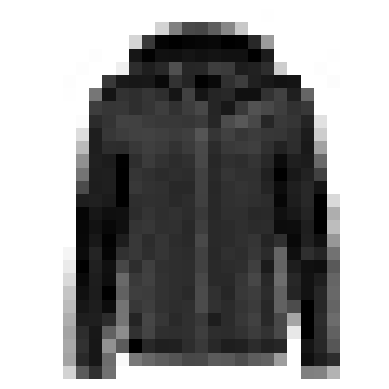

In [6]:
Num = int(input("Enter the number to visulaize in training data(<60000):"))
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[Num]])
sample_image = X_train[Num]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

### Data Modeling
Now, we move on to data modeling. We will start by applying a basic Naive Bayes algorithm to the dataset. This initial model will serve as a benchmark for evaluating the performance of other algorithms.

In [13]:
import pickle
import pandas as pd
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
Y_test = Fashion_test['label']
X_test = Fashion_test.drop(['label'],axis=1)
Naive_M= GaussianNB()
training_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    training_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
    %time Naive_M.fit(X_train, Y_train)
pickle.dump(Naive_M, open('Naive_M.pkl', 'wb'))
pickled_model = pickle.load(open('Naive_M.pkl', 'rb'))

(10000, 785)
Wall time: 319 ms
(10000, 785)
Wall time: 377 ms
(10000, 785)
Wall time: 387 ms
(10000, 785)
Wall time: 402 ms
(10000, 785)
Wall time: 328 ms
(10000, 785)
Wall time: 350 ms


Let's visualize the results

INSAMPLE RESULTS:



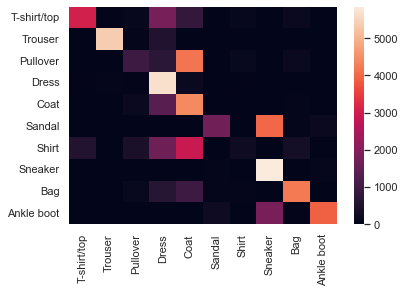

In [14]:
print("INSAMPLE RESULTS:")
print()
Y_train = training_data['label']
X_train = training_data.drop(['label'],axis=1)
y_train_hat_N = pickled_model.predict(X_train)
CF_matrix= confusion_matrix(Y_train,y_train_hat_N)
import seaborn as sns; sns.set() 
cm_df = pd.DataFrame(CF_matrix,
                     index = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], 
                     columns = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
sns.heatmap(cm_df, annot=False)
plt.show()

OUTSAMPLE RESULTS:



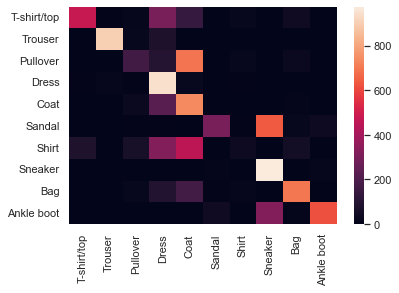

In [15]:
print("OUTSAMPLE RESULTS:")
print()
y_test_hat_N = pickled_model.predict(X_test)
cf_matrix=confusion_matrix(Y_test,y_test_hat_N)
import seaborn as sns; sns.set() 
cm_df = pd.DataFrame(cf_matrix,
                     index = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], 
                     columns = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
sns.heatmap(cm_df, annot=False)
plt.show()

In [16]:
out_of_sample_acc = accuracy_score(Y_test,y_test_hat_N, normalize = True) * 100
print("Out-of-sample Accuracy: ", out_of_sample_acc)

Out-of-sample Accuracy:  58.660000000000004


Just crossing if we processed data accurately by runnig the model on entire data without dividing into chucks

In [17]:
# crosschecking with out chunks
Fashion_t = pd.read_csv('fashion-mnist_train.csv') 
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
print(y_train.shape)
model = GaussianNB()
y_train= Fashion_t['label']
x_tarin=Fashion_t.drop(['label'],axis=1)
Y_t= Fashion_test['label']
x_t=Fashion_test.drop(['label'],axis=1)
model= model.fit(x_tarin, y_train)
ytest_hat = model.predict(x_t)
print(confusion_matrix(Y_t,ytest_hat))
print(classification_report(Y_t,ytest_hat))

(60000,)
[[594  42  25 196  87   0  16   0  40   0]
 [  0 940  16  33   2   1   8   0   0   0]
 [  4   7 324  68 553   0  21   0  23   0]
 [  6 311   6 644  25   0   5   0   3   0]
 [  0  33  37 155 765   0   1   0   9   0]
 [  1   1   1   2   0 289   6 648  14  38]
 [113  32 103 236 432   0  38   0  46   0]
 [  0   0   0   0   0   3   0 978   0  19]
 [  1   2  17  79 161   3  22   3 711   1]
 [  0   0   0   1   0  27   2 328  11 631]]
              precision    recall  f1-score   support

           0       0.83      0.59      0.69      1000
           1       0.69      0.94      0.79      1000
           2       0.61      0.32      0.42      1000
           3       0.46      0.64      0.53      1000
           4       0.38      0.77      0.51      1000
           5       0.89      0.29      0.44      1000
           6       0.32      0.04      0.07      1000
           7       0.50      0.98      0.66      1000
           8       0.83      0.71      0.77      1000
           9       

**Applying Logistic Regression**
- Next, we will apply Logistic Regression to the dataset without any Principal Component Analysis (PCA). Logistic Regression is a suitable choice for this dataset because it is a straightforward and interpretable model that performs well on classification tasks. Given the nature of the Fashion MNIST dataset, which involves classifying images into different fashion categories, Logistic Regression can effectively handle the multi-class classification problem and provide a solid baseline for comparison with more complex models.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
#from sklearn.metrics import metrics
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
Logistic_Model = LogisticRegression()
#Logistic_Model = LogisticRegression()
#param_grid = [    
#    {'penalty' : ['l2'],
#    'solver' : ['liblinear','sag'],
#    'max_iter' : [2000]
#    }
#]
#grid = GridSearchCV(Logistic_Model, param_grid, cv =2, scoring='accuracy')
#Logistic_Model2 = LogisticRegression(penalty='l2',solver='saga')
training_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    training_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
    
    %time Logistic_Model = Logistic_Model.fit(X_train,Y_train)
  #  %time Logistic_Model2= grid.fit(X_train,Y_train)
pickle.dump(Logistic_Model, open('Logistic_withoutPCA.pkl', 'wb'))
pickled_model = pickle.load(open('Logistic_WithoutPCA.pkl', 'rb'))


(10000, 785)
Wall time: 2.35 s
(10000, 785)
Wall time: 2.37 s
(10000, 785)
Wall time: 2.36 s
(10000, 785)
Wall time: 2.36 s
(10000, 785)
Wall time: 2.34 s
(10000, 785)
Wall time: 2.42 s


Lets look at results Logisctic regression without any PCA 

In [19]:
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
Y_test = Fashion_test['label']
X_test = Fashion_test.drop(['label'],axis=1)
Y_test_hat_LM1 = pickled_model.predict(X_test)
print("OUTSAMPLE RESULTS:")
print()
print(confusion_matrix(Y_test,Y_test_hat_LM1))
print(classification_report(Y_test,Y_test_hat_LM1))

OUTSAMPLE RESULTS:

[[792  10  18  48   7   0 103   0  21   1]
 [  1 973   2  16   1   2   5   0   0   0]
 [ 25   5 735  13 129   0  84   0   9   0]
 [ 43  22  18 842  43   0  22   0   9   1]
 [  5   2 112  27 768   1  82   0   3   0]
 [  2   1   1   1   0 867   1  67   9  51]
 [155   5 111  36 118   0 552   0  23   0]
 [  0   0   0   0   0  36   0 909   0  55]
 [  7   2  14   5   6   8  18   5 934   1]
 [  0   0   0   0   0  15   0  35   2 948]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1000
           1       0.95      0.97      0.96      1000
           2       0.73      0.73      0.73      1000
           3       0.85      0.84      0.85      1000
           4       0.72      0.77      0.74      1000
           5       0.93      0.87      0.90      1000
           6       0.64      0.55      0.59      1000
           7       0.89      0.91      0.90      1000
           8       0.92      0.93      0.93      1000
        

In [20]:
Fashion_Train = pd.read_csv('fashion-mnist_train.csv')
Y_Train = Fashion_Train['label']
X_Train = Fashion_Train.drop(['label'],axis=1)
Y_Train_hat = pickled_model.predict(X_Train)
print("INSAMPLE RESULTS:")
print()
print(confusion_matrix(Y_Train,Y_Train_hat))
print(classification_report(Y_Train,Y_Train_hat))

print()
in_sample_acc = accuracy_score(Y_Train,Y_Train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(Y_test,Y_test_hat_LM1, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

INSAMPLE RESULTS:

[[4862   33  121  276   40    2  569    3   93    1]
 [  27 5780   27  108   35    0   18    2    2    1]
 [ 118   21 4474   64  772    2  500    0   48    1]
 [ 245  106   70 5078  288    0  181    1   30    1]
 [  21   14  649  169 4559    1  559    0   28    0]
 [   3    6    4    3    2 5358    7  305   60  252]
 [ 859   23  683  185  671    0 3443    2  133    1]
 [   0    0    0    0    1  212    2 5496   13  276]
 [  29   12   49   45   35   41   87   24 5670    8]
 [   0    0    0    0    0  120    0  202   11 5667]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      6000
           1       0.96      0.96      0.96      6000
           2       0.74      0.75      0.74      6000
           3       0.86      0.85      0.85      6000
           4       0.71      0.76      0.74      6000
           5       0.93      0.89      0.91      6000
           6       0.64      0.57      0.61      6000
           7     

### Analysis Logistic Regression without PCA:
**Overall Performance:**
- The model achieved an in-sample accuracy of approximately 84%, which is consistent with the out-of-sample accuracy of 83.2%. This indicates that the model is performing consistently on both the training and test data, suggesting that it is neither overfitting nor underfitting significantly.
**Class-wise Performance:**
- The precision, recall, and F1-scores vary across different classes. For instance, class 1 (label 1) has the highest precision and recall, both at 96%, indicating that the model is very good at identifying items of this class correctly and rarely misclassifies other items as this class.
- On the other hand, class 6 (label 6) has the lowest recall at 57% and a relatively lower F1-score at 61%, suggesting that the model struggles to correctly identify items of this class and often misses them.
**Common Misclassifications:**
- Observing the confusion matrix, we can see that certain classes are frequently confused with others. For example, a significant number of items from class 6 are misclassified into class 0 and class 4. This could be due to visual similarities between these classes or limitations in the feature space that Logistic Regression can effectively separate.
**Suitability of Logistic Regression:**
- Logistic Regression, being a linear model, has shown a reasonable performance on this multi-class classification problem. However, the variations in precision and recall across different classes suggest that non-linear models might capture the complexities of the data better and potentially improve performance.

In summary, while Logistic Regression provides a good baseline for this dataset with decent accuracy and interpretability, exploring more complex models might yield better performance, especially for classes that are currently misclassified more frequently.

**Dimensionality Reduction**
- Dimensionality reduction is an essential step in data preprocessing, particularly for high-dimensional datasets like the Fashion MNIST dataset. Here are some key reasons why dimensionality reduction is beneficial for this data:
  - **Curse of Dimensionality**:
    - High-dimensional data can lead to overfitting, where the model performs well on training data but poorly on unseen data. Reducing the number of features helps in mitigating this risk by simplifying the model.
  - **Improved Performance**:
     - Reducing the number of features can lead to faster training times and improved performance of machine learning algorithms. This is particularly important for complex models or large datasets.
    
  - **Noise Reduction**:
     - Dimensionality reduction can help in removing noise and redundant information from the dataset, leading to cleaner and more informative features. This can improve the model's ability to learn relevant patterns.
  - **Visualization**:
     - With reduced dimensions, it becomes easier to visualize the data and understand its structure. Techniques like PCA can project high-dimensional data into 2D or 3D spaces, making it easier to analyze.

  - **Storage and Memory Efficiency**:
     - Reducing the number of features decreases the amount of storage and memory required for the dataset, which can be crucial for large-scale applications.

- In the context of the Fashion MNIST dataset, dimensionality reduction will help us create a more efficient and effective model by focusing on the most significant features, thereby enhancing overall model performance and interpretability.

In [21]:
total_dataset = pd.concat([training_data,Fashion_test],axis =0, ignore_index=True)
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# InitializeDimension Reduction model
pca = PCA(svd_solver='randomized', n_components=144, 
          whiten=True, random_state=0)
X = total_dataset.drop(['label'],axis=1)
y = total_dataset['label']    
%time PCA_full_Data= pca.fit_transform(X)

PCA_full_Data.shape  

Wall time: 10 s


(70000, 144)

Data shape after PCA

In [22]:
X_PCA = PCA_full_Data.reshape((70000,12,12))
X_PCA.shape

(70000, 12, 12)

Now Let's try to visualize one image after pca how each image look like:

Enter the number to visulaize in training data(<60000):5000
0


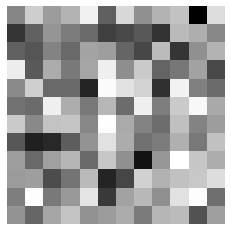

In [23]:
Num_1 = int(input("Enter the number to visulaize in training data(<60000):"))
print(y_train[Num_1])
sample_image = X_PCA[Num_1]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

Lets see in multiple pictures

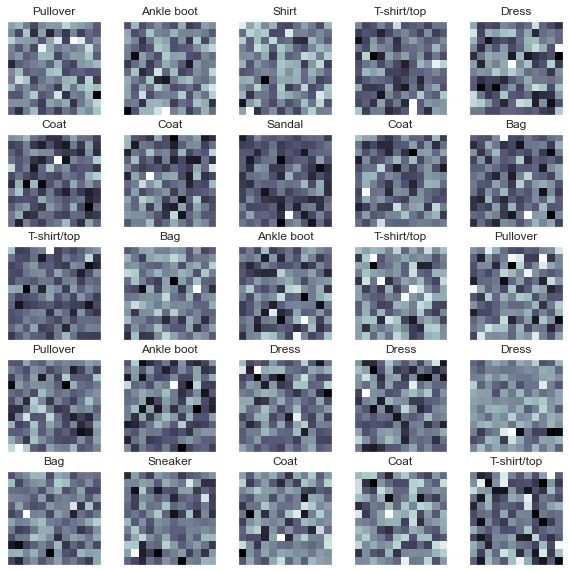

In [24]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_PCA[i], cmap='bone')
    axi.set_title(class_names[y[i]])
    axi.set(xticks=[], yticks=[])

In [28]:
PCA_full_Data.shape

(70000, 144)

### Modeling data with PCA  using Hyperparameter Tuning and Saving Model 

In this section, we perform hyperparameter tuning for the Logistic Regression model using GridSearchCV, and then save the best model:

1. **Importing Required Libraries:**
   - `GridSearchCV` from `sklearn.model_selection` is used for hyperparameter tuning.
   - `LogisticRegression` from `sklearn.linear_model` is the model being tuned.
   - `warnings` module is used to ignore any warnings during the process.

2. **Setting Up the Model and Parameters:**
   - A Logistic Regression model (`Logistic_Model`) is instantiated.
   - The `param_grid` dictionary specifies the parameters for the grid search:
     - `penalty`: Regularization term, here 'l2' is used to prevent overfitting by penalizing large coefficients.
     - `solver`: Algorithm to use in the optimization problem, 'liblinear' is suitable for small datasets and 'sag' is efficient for larger datasets; both are tested to identify the best performance.
     - `max_iter`: Maximum number of iterations for the solver, set to 200 and 50 to ensure convergence; higher values allow more iterations to reach a solution, and lower values are tested for efficiency.

3. **Splitting the Data:**
   - The dataset `PCA_full_Data` and labels `y` are split into training and test sets using `train_test_split` with 15% of the data as the test set and a random state of 0 for reproducibility.

4. **Performing Grid Search:**
   - `GridSearchCV` is used with the Logistic Regression model, the parameter grid, 10-fold cross-validation (`cv=10`), accuracy scoring, and utilizing all available CPU cores (`n_jobs=-1`).
   - The `%time` magic command measures the time taken to fit the model to the training data.

5. **Identifying the Best Model:**
   - The best hyperparameters found by GridSearchCV are printed.
   - The best model (`bestModel_LM`) is stored from the grid search results.

6. **Saving and Loading the Model:**
   - The best model is saved to a file named 'Logistic_PCA_1.pkl' using `pickle.dump`.
   - The saved model is then loaded back into memory using `pickle.load` and stored in `pickled_model_LP`.

This process ensures that the best performing Logistic Regression model, based on the specified hyperparameters, is identified, saved, and can be re-used for future predictions or analysis. The chosen parameters (`penalty`, `solver`, `max_iter`) are critical for optimizing the model's performance, balancing the trade-off between bias and variance, and ensuring computational efficiency.


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
Logistic_Model = LogisticRegression()
param_grid = [    
    {'penalty' : ['l2'],
    'solver' : ['liblinear','sag'],
    'max_iter' : [200,50]
    }
]
Xtrain, X_t, ytrain, y_t = train_test_split(PCA_full_Data, y, test_size=0.15, random_state=0)
grid = GridSearchCV(Logistic_Model, param_grid, cv =10, scoring='accuracy',n_jobs=-1)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
bestModel_LM = grid.best_estimator_
pickle.dump(bestModel_LM, open('Logistic_PCA_1.pkl', 'wb'))
pickled_model_LP = pickle.load(open('Logistic_PCA_1.pkl', 'rb'))


In [30]:
print("RESULTS:")
Y_t_hat_LP = pickled_model_LP.predict(X_t)
Y_train_hat_LP = pickled_model_LP.predict(Xtrain)
in_sample_acc = accuracy_score(ytrain,Y_train_hat_LP, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_t,Y_t_hat_LP, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)
print("Out Sample results:")
print(confusion_matrix(y_t,Y_t_hat_LP))
print(classification_report(y_t,Y_t_hat_LP))
print("In Sample results:")
print(confusion_matrix(ytrain,Y_train_hat_LP))
print(classification_report(ytrain,Y_train_hat_LP))

RESULTS:
In-sample Accuracy:  86.07226890756301
Out-of-sample Accuracy:  85.48571428571428
Out Sample results:
[[ 846    5   16   39    2    1   87    0   15    2]
 [   3 1049    6   20    2    0    4    0    0    0]
 [  11    4  798    9  114    1   96    0   13    0]
 [  32   15   18  890   21    1   31    0    1    0]
 [   1    2  103   43  847    0  100    0    5    0]
 [   1    2    0    0    0  983    0   48    9   14]
 [ 162    1  120   31  100    1  582    0   23    0]
 [   0    0    0    0    0   31    0  975    2   36]
 [   5    1    3    9   10    9   16    7 1024    1]
 [   0    1    0    0    0   18    0   40    0  982]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1013
           1       0.97      0.97      0.97      1084
           2       0.75      0.76      0.76      1046
           3       0.85      0.88      0.87      1009
           4       0.77      0.77      0.77      1101
           5       0.94      0.93

### Analysis:

**Overall Performance:**
- The in-sample accuracy of 86.07% is slightly higher than the out-of-sample accuracy of 85.49%, indicating that the model performs consistently on both the training and test data. This consistency suggests that the model is well-generalized and not overfitting.

**Class-wise Performance:**
- The precision, recall, and F1-scores for most classes are high, particularly for class 1 (label 1) and class 9 (label 9), which have precision and recall values close to or above 0.95 in both in-sample and out-of-sample results. This indicates the model is very good at correctly identifying these classes and rarely misclassifies other items as these classes.
- Class 6 (label 6) has the lowest performance metrics, with a recall of 0.57 in the out-of-sample results and 0.60 in the in-sample results, suggesting that the model struggles to correctly identify items from this class.

**Common Misclassifications:**
- The confusion matrices reveal that certain classes are frequently confused with others. For example, a significant number of items from class 6 are misclassified into class 0, class 4, and class 2. This could be due to visual similarities between these classes or limitations in the model's ability to distinguish between these features.

**Precision and Recall:**
- High precision and recall for classes like 1, 5, 7, 8, and 9 suggest that the model is very effective at correctly identifying these categories with minimal false positives and false negatives.
- Lower precision and recall for class 6 indicate that further feature engineering or model tuning might be necessary to improve performance for this particular class.

**Model Suitability:**
- The Logistic Regression model with PCA has demonstrated good performance overall, providing a solid benchmark for further comparisons with more complex models.
- The consistent accuracy and reasonable class-wise metrics affirm that dimensionality reduction via PCA has effectively preserved the essential features of the dataset, allowing the model to perform well.

In summary, the Logistic Regression model with PCA has shown robust performance with good accuracy and consistency across both in-sample and out-of-sample evaluations. While certain classes like class 6 require further improvement, the overall results indicate that the model is well-suited for this classification task and provides a reliable baseline for future enhancements.


### Applying Support Vector Machine (SVM)

In this section, we apply a Support Vector Machine (SVM) model to the Fashion MNIST dataset:

1. **Loading Data in Chunks:**
   - The dataset is loaded in chunks of 10,000 rows each to handle memory efficiently using `pd.read_csv` with the `chunksize` parameter.

2. **Choosing SVM:**
   - **Why SVM?**
     - **Effective in High-Dimensional Spaces:** SVM is particularly effective in high-dimensional spaces and in cases where the number of dimensions is greater than the number of samples.
     - **Memory Efficient:** SVM uses a subset of training points in the decision function (called support vectors), making it memory efficient.
     - **Versatility:** SVM is versatile as it can be used with different kernel functions (linear, polynomial, radial basis function (RBF), etc.), allowing for a variety of decision boundaries.

3. **Handling Class Imbalance:**
   - The `class_weight='balanced'` parameter is used to automatically adjust weights inversely proportional to class frequencies in the input data, addressing potential class imbalance in the dataset.

4. **Model Training:**
   - For each chunk of data, the SVM model is trained by concatenating it with the previously processed chunks, ensuring the model incrementally learns from the entire dataset.

5. **Saving the Model:**
   - The trained SVM model is saved to a file named 'SVM_Model.pkl' using `pickle.dump`, enabling future reuse and deployment without retraining.

By choosing SVM, we leverage its strengths in handling high-dimensional data and its capability to create complex decision boundaries, which are beneficial for the classification tasks in the Fashion MNIST dataset.


In [ ]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
#from sklearn.metrics import metrics
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
SVC_Model = SVC(class_weight='balanced',verbose=True)
SVM_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    SVM_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
    %time SVM_Model = SVC_Model.fit(X_train,Y_train)
pickle.dump(SVM_Model, open('SVM_Model.pkl', 'wb'))

In [16]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

Lets test our SVM model

In [17]:
import pickle
pickled_model_SVM = pickle.load(open('SVM_Model.pkl', 'rb'))

In [18]:
Fashion_Train = pd.read_csv('fashion-mnist_train.csv')
Y_Train_SVM = Fashion_Train['label']
X_Train_SVM = Fashion_Train.drop(['label'],axis=1)
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
Y_test_SVM = Fashion_test['label']
X_test_SVM = Fashion_test.drop(['label'],axis=1)
print("RESULTS:")
Y_t_hat_SVM = pickled_model_SVM.predict(X_test_SVM)
#Y_train_hat_SVM = pickled_model_SVM.predict(X_Train_SVM)
#in_sample_acc = accuracy_score(Y_Train_SVM,Y_train_hat_SVM, normalize = True) * 100
out_of_sample_acc = accuracy_score(Y_test_SVM,Y_t_hat_SVM, normalize = True) * 100
#print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)
print("Out Sample results:")
print(confusion_matrix(Y_test_SVM,Y_t_hat_SVM))
print(classification_report(Y_test_SVM,Y_t_hat_SVM))
#print("In Sample results:")
#print(confusion_matrix(Y_Train_SVM,Y_train_hat_SVM))
#print(classification_report(Y_Train_SVM,Y_train_hat_SVM))

RESULTS:
Out-of-sample Accuracy:  86.57000000000001
Out Sample results:
[[838   1  13  46   0   2  88   0  12   0]
 [  4 960  10  21   0   1   4   0   0   0]
 [ 16   1 796  12 104   1  61   0   9   0]
 [ 29   7  13 906  19   0  23   0   3   0]
 [  1   1  74  40 831   0  50   0   3   0]
 [  1   0   0   0   0 915   0  57   7  20]
 [174   1 102  27  70   0 609   0  16   1]
 [  0   0   0   0   0  31   0 901   0  68]
 [  6   0   6   3   2   7  13   4 956   3]
 [  0   0   0   0   0  12   0  43   0 945]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.79      0.80      0.79      1000
           3       0.86      0.91      0.88      1000
           4       0.81      0.83      0.82      1000
           5       0.94      0.92      0.93      1000
           6       0.72      0.61      0.66      1000
           7       0.90      0.90      0.90      1000
          

### Analysis:

**Overall Performance:**
- The out-of-sample accuracy of 86.57% demonstrates that the SVM model performs well on the test data. This accuracy is slightly higher than the previous models, indicating that SVM effectively captures the underlying patterns in the Fashion MNIST dataset.

**Class-wise Performance:**
- The precision, recall, and F1-scores for most classes are high. Particularly, class 1 (label 1) achieves very high metrics with a precision of 0.99 and recall of 0.96, indicating that the model is extremely effective at identifying this class with minimal false positives and false negatives.
- Class 6 (label 6) has lower performance metrics, with a recall of 0.61, suggesting that the model has difficulty correctly identifying items from this class. This is consistent with the trends observed in previous models.

**Common Misclassifications:**
- The confusion matrix shows that certain classes are frequently confused with others. For example, a significant number of items from class 6 are misclassified into class 0 and class 2. This may be due to visual similarities between these classes or limitations in the model's ability to differentiate between these features.

**Precision and Recall:**
- High precision and recall for classes like 1, 5, 7, 8, and 9 suggest that the SVM model is very effective at correctly identifying these categories, resulting in high accuracy and low error rates for these classes.
- The lower precision and recall for class 6 indicate that additional feature engineering or alternative modeling approaches might be necessary to improve performance for this particular class.

**Model Suitability:**
- The SVM model has demonstrated strong performance overall, with robust accuracy and high precision and recall for most classes. This confirms the suitability of SVM for this classification task, particularly given its strengths in handling high-dimensional data and creating complex decision boundaries.

In summary, the SVM model with PCA has shown excellent performance with an out-of-sample accuracy of 86.57%. While certain classes like class 6 still require improvement, the overall results indicate that the SVM model is well-suited for this classification task, providing a reliable benchmark for future enhancements and comparisons.


# Auc For SVM

In [19]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
        unique_class = set(actual_class)
        roc_auc_dict = {}
        for per_class in unique_class:
            other_class = [x for x in unique_class if x != per_class]
            new_actual_class = [0 if x in other_class else 1 for x in actual_class]
            new_pred_class = [0 if x in other_class else 1 for x in pred_class]
            roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
            roc_auc_dict[per_class] = roc_auc
        return roc_auc_dict

AUC for SVM

In [35]:
from sklearn.metrics import roc_auc_score
AUC_score = roc_auc_score_multiclass(Y_test_SVM, Y_t_hat_SVM)
print(AUC_score)

{0: 0.9061666666666667, 1: 0.9793888888888889, 2: 0.8858888888888888, 3: 0.9447222222222224, 4: 0.9046666666666666, 5: 0.9545, 6: 0.7912222222222222, 7: 0.9447222222222222, 8: 0.9752222222222222, 9: 0.9673888888888887}


**Analysis of AUC Scores for SVM Model**
- The Area Under the Curve (AUC) score is a performance metric for classification models. It measures the ability of the model to distinguish between classes. Higher AUC values indicate better performance. 

- The SVM model with PCA demonstrates excellent performance in distinguishing between most classes in the Fashion MNIST dataset, with AUC scores generally above 0.90. However, class 6 remains challenging, as indicated by its lower AUC score of 0.7912. This aligns with the previous analysis, suggesting that further improvements could be made for this particular class. Overall, the high AUC scores confirm the model's robustness and effectiveness in classifying the fashion items.

### Comparison of SVM and Logistic Regression Results with PCA

#### Overall Performance:
- **Logistic Regression:**
  - **In-sample Accuracy:** 86.07%
  - **Out-of-sample Accuracy:** 85.49%
- **SVM:**
  - **Out-of-sample Accuracy:** 86.57%

The SVM model slightly outperforms the Logistic Regression model in out-of-sample accuracy (86.57% vs. 85.49%). Both models show high precision and recall for several classes, particularly classes 1, 5, 7, 8, and 9. However, both models struggle with class 6, although SVM shows a marginal improvement in recall for this class.

#### Summary:
While both models provide robust performance, SVM demonstrates a slight edge in overall accuracy and class-wise performance, making it a more suitable choice for the Fashion MNIST dataset.


### Applying Random Forest Classifier

In this section, we apply a Random Forest Classifier to the Fashion MNIST dataset:

1. **Importing Required Libraries:**
   - `RandomForestClassifier` from `sklearn.ensemble` is used for creating the Random Forest model.
   - `warnings` module is used to ignore any warnings during the process.

2. **Loading Data in Chunks:**
   - The dataset is loaded in chunks of 10,000 rows each to handle memory efficiently using `pd.read_csv` with the `chunksize` parameter.

3. **Choosing Random Forest:**
   - **Why Random Forest?**
     - **Robustness:** Random Forest is robust to overfitting due to the ensemble of decision trees, which makes it well-suited for complex datasets like Fashion MNIST.
     - **Handling High-Dimensional Data:** It can handle high-dimensional data effectively, capturing complex patterns and interactions among features.
     - **Feature Importance:** Random Forest provides an indication of feature importance, which helps in understanding the contribution of each feature to the prediction.
     - **Scalability:** It scales well with large datasets and can handle a large number of training samples.

4. **Model Training:**
   - For each chunk of data, the Random Forest model is trained by concatenating it with the previously processed chunks, ensuring the model incrementally learns from the entire dataset.
   - `RFC_Model` is initialized with 100 trees (`n_estimators=100`) and a random state of 0 for reproducibility.
   - The model is fitted to each chunk of the training data (`X_train` and `Y_train`).

5. **Saving the Model:**
   - The trained Random Forest model is saved to a file named 'RFC_Model.pkl' using `pickle.dump`, enabling future reuse and deployment without retraining.

By choosing Random Forest, we leverage its strengths in handling high-dimensional data, providing robustness against overfitting, and offering insights into feature importance. These attributes make it an excellent choice for the classification tasks in the Fashion MNIST dataset.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
#from sklearn.metrics import metrics
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
RFC_Model = RandomForestClassifier(n_estimators=100, random_state=0)
RFC_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    RFC_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
    %time RFC_Model = RFC_Model.fit(X_train,Y_train)
pickle.dump(RFC_Model, open('RFC_Model.pkl', 'wb'))

Lets test our random forest model

In [36]:
RFC_Model = pickle.load(open('RFC_Model.pkl', 'rb'))
Fashion_Train = pd.read_csv('fashion-mnist_train.csv')
Y_Train_RFC = Fashion_Train['label']
X_Train_RFC = Fashion_Train.drop(['label'],axis=1)
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
Y_test_RFC = Fashion_test['label']
X_test_RFC = Fashion_test.drop(['label'],axis=1)

In [37]:
print("RESULTS:")
print()
Y_t_hat_RFC = RFC_Model.predict(X_test_RFC)
Y_train_hat_RFC = RFC_Model.predict(X_Train_RFC)
in_sample_acc = accuracy_score(Y_Train_RFC,Y_train_hat_RFC, normalize = True) * 100
out_of_sample_acc = accuracy_score(Y_test_RFC,Y_t_hat_RFC, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)
print("Out Sample results:")
print(confusion_matrix(Y_test_RFC,Y_t_hat_RFC))
print(classification_report(Y_test_RFC,Y_t_hat_RFC))
print("In Sample results:")
print(confusion_matrix(Y_Train_RFC,Y_train_hat_RFC))
print(classification_report(Y_Train_RFC,Y_train_hat_RFC))

RESULTS:

In-sample Accuracy:  88.24833333333333
Out-of-sample Accuracy:  86.03
Out Sample results:
[[818   2  16  52   2   3  90   0  17   0]
 [  2 961   8  22   1   1   4   0   1   0]
 [  8   3 793  10 117   0  57   0  12   0]
 [ 18   9  10 918  26   0  19   0   0   0]
 [  1   0  87  45 820   0  44   0   3   0]
 [  0   0   0   0   0 930   0  45   7  18]
 [190   1 123  32  77   0 554   0  23   0]
 [  0   0   0   0   0  27   0 903   1  69]
 [  2   1  11   0   3   3   9   3 967   1]
 [  0   0   1   0   0   9   0  49   2 939]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.76      0.79      0.77      1000
           3       0.85      0.92      0.88      1000
           4       0.78      0.82      0.80      1000
           5       0.96      0.93      0.94      1000
           6       0.71      0.55      0.62      1000
           7       0.90      0.90   

### Analysis of Random Forest:
**Overall Performance:**
- The Random Forest Classifier achieves an in-sample accuracy of 88.25% and an out-of-sample accuracy of 86.03%. This indicates that the model performs well on both the training and test data, though there is a slight decrease in accuracy when applied to unseen data.
**Class-wise Performance:**
- The precision, recall, and F1-scores for most classes are high. Class 1 (label 1) achieves particularly high metrics with a precision of 0.98 and recall of 0.96 in the out-of-sample results, indicating that the model is very effective at identifying this class with minimal false positives and false negatives.
- Class 6 (label 6) has lower performance metrics, with a recall of 0.55 in the out-of-sample results, suggesting that the model has difficulty correctly identifying items from this class. This is consistent with the trends observed in previous models.
**Common Misclassifications:**
- The confusion matrix shows that certain classes are frequently confused with others. For example, a significant number of items from class 6 are misclassified into classes 0 and 2. This may be due to visual similarities between these classes or limitations in the model's ability to differentiate between these features.
**Precision and Recall:**
- High precision and recall for classes like 1, 5, 7, 8, and 9 suggest that the Random Forest model is very effective at correctly identifying these categories, resulting in high accuracy and low error rates for these classes.
- The lower precision and recall for class 6 indicate that additional feature engineering or alternative modeling approaches might be necessary to improve performance for this particular class.
**Model Suitability:**
- The Random Forest model demonstrates strong performance overall, with robust accuracy and high precision and recall for most classes. This confirms the suitability of Random Forest for this classification task, particularly given its strengths in handling high-dimensional data and creating complex decision boundaries.

In summary, the Random Forest model with PCA has shown excellent performance with an out-of-sample accuracy of 86.03%. While certain classes like class 6 still require improvement, the overall results indicate that the Random Forest model is well-suited for this classification task, providing a reliable benchmark for future enhancements and comparisons.

Lets look at AUC of Random Forest

In [38]:
from sklearn.metrics import roc_auc_score
AUC_score = roc_auc_score_multiclass(Y_test_RFC, Y_t_hat_RFC)
print(AUC_score)

{0: 0.8967222222222222, 1: 0.979611111111111, 2: 0.8822777777777778, 3: 0.9500555555555557, 4: 0.8974444444444444, 5: 0.9626111111111112, 6: 0.7646111111111111, 7: 0.9461111111111111, 8: 0.9798333333333334, 9: 0.9646111111111111}


### AUC Scores for Random Forest Classifier
**Overall Performance:**
- The Random Forest model achieves high AUC scores across most classes, with scores generally above 0.88.
- The highest AUC scores are observed for class 8 (0.9798) and class 1 (0.9796), indicating exceptional performance in distinguishing these classes.
- The lowest AUC score is for class 6 (0.7646), suggesting difficulty in distinguishing this class, consistent with the lower precision and recall observed previously.

### Analysis:
**Overall AUC Scores:**
- Both models exhibit high AUC scores across most classes, indicating strong overall performance.
- Random Forest slightly outperforms SVM in several classes such as class 3 (0.9501 vs. 0.9447), class 5 (0.9626 vs. 0.9545), and class 8 (0.9798 vs. 0.9752).
**High Performing Classes:**
- Both models achieve very high AUC scores for classes 1, 5, 7, 8, and 9, with scores around or above 0.95, indicating excellent discriminatory power for these classes.
- Class 1 is particularly well-classified by both models, with AUC scores of 0.9796 (Random Forest) and 0.9794 (SVM).
**Low Performing Classes:**
- Class 6 has the lowest AUC scores in both models, with Random Forest scoring 0.7646 and SVM scoring 0.7912. This indicates that both models face challenges in distinguishing this class from others, though SVM performs slightly better in this regard.
**Precision and Recall Comparison:**
- Random Forest generally achieves higher precision and recall scores for several classes compared to SVM, particularly in class 5 (0.96 vs. 0.94 for precision) and class 9 (0.94 vs. 0.93 for precision).
- SVM, on the other hand, has a slightly higher recall for class 6 (0.61 vs. 0.55), suggesting better performance in identifying items from this class.

In Summary both the Random Forest and SVM models perform well on the Fashion MNIST dataset, with high AUC scores across most classes. While Random Forest achieves higher AUC scores in some classes and demonstrates slightly better overall precision and recall, SVM shows marginally better performance in class 6. Therefore, both models are suitable for this classification task, with Random Forest providing a slight edge in overall performance.

Let try KNeighborsClassifier as it is simple, non parametric, versatile, no training phases however it has challenges computational cost, Memory Usage, Distance Metric selection, and curse of dimentionality.I know it will take hours together to run but wanted to try

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
KNN_model = KNeighborsClassifier(n_neighbors=5,  weights='uniform', n_jobs=-1)
training_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    MLP_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
#     %time NN_Model = KNN_model.fit(X_train,Y_train)
    
# pickle.dump(KNN_model, open('KNN_model_f.pkl', 'wb'))
KNN_Model = pickle.load(open('KNN_model_f.pkl', 'rb'))


#Fashion_Train = pd.read_csv('fashion-mnist_train.csv')
#Fashion_test = pd.read_csv('fashion-mnist_test.csv')
#total_dataset = pd.concat([Fashion_Train,Fashion_test],axis =0, ignore_index=True)
#X=total_dataset.drop(['label'],axis=1)
#y=total_dataset['label']
#KNN_model = KNeighborsClassifier()

#param_grid = {'n_neighbors': [3,4,5,7]}
#cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
#grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
#                    return_train_score=True)
#%time grid.fit(X, y)


(10000, 785)
(10000, 785)
(10000, 785)
(10000, 785)
(10000, 785)
(10000, 785)


In [27]:
Fashion_Train = pd.read_csv('fashion-mnist_train.csv')
Y_Train_KNN = Fashion_Train['label']
X_Train_KNN = np.array(Fashion_Train.drop(['label'],axis=1))
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
Y_test_KNN = Fashion_test['label']
X_test_KNN=np.array(Fashion_test.drop(['label'],axis=1))

y_train_hat = KNN_Model.predict(X_Train_KNN)
y_test_hat = KNN_Model.predict(X_test_KNN)

in_sample_acc = accuracy_score(Y_Train_KNN,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(Y_test_KNN,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  82.88499999999999
Out-of-sample Accuracy:  82.0


KNN classifier

In [ ]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(PCA_full_Data, y, test_size=0.20, random_state=0)
Model_knn = pickle.load(open('KNN_model_best1.pkl', 'rb'))
Y_t_hat_KNN = Model_knn.predict(X_test_k)
Y_train_hat_KNN = Model_knn.predict(X_train_k)
in_sample_acc = accuracy_score(y_train_k,Y_train_hat_KNN, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test_k,Y_t_hat_KNN, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

KNN is not performing well due to curse of dimentionality

In [ ]:
from sklearn.neural_network import MLPClassifier
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
NN_Model = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[500])
NN_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    MLP_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
    %time NN_Model = NN_Model.fit(X_train,Y_train)
    
    
pickle.dump(NN_Model, open('NN_Model.pkl', 'wb'))




In [29]:
NN_Model = pickle.load(open('NN_Model.pkl', 'rb'))
Fashion_Train = pd.read_csv('fashion-mnist_train.csv')
Y_Train_NN = Fashion_Train['label']
X_Train_NN = Fashion_Train.drop(['label'],axis=1)
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
Y_test_NN = Fashion_test['label']
X_test_NN=Fashion_test.drop(['label'],axis=1)

y_train_hat = NN_Model.predict(X_Train_NN)
y_test_hat = NN_Model.predict(X_test_NN)

in_sample_acc = accuracy_score(Y_Train_NN,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(Y_test_NN,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  84.83833333333334
Out-of-sample Accuracy:  83.31


In [ ]:
from sklearn.neural_network import MLPClassifier
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
NN_Model = MLPClassifier(solver='adam',random_state=0,hidden_layer_sizes=[200])
NN_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    MLP_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
    %time NN_Model = NN_Model.fit(X_train,Y_train)
    
    
pickle.dump(NN_Model, open('NN_Model.pkl', 'wb'))




In [30]:
NN_Model = pickle.load(open('NN_Model.pkl', 'rb'))
y_train_hat = NN_Model.predict(X_Train_NN)
y_test_hat = NN_Model.predict(X_test_NN)

in_sample_acc = accuracy_score(Y_Train_NN,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(Y_test_NN,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  84.83833333333334
Out-of-sample Accuracy:  83.31


In [ ]:
NN_HP_Model = MLPClassifier()
X_train, X_test, y_train, y_test = train_test_split(PCA_full_Data, y, test_size=0.50,  random_state=0)
from sklearn.model_selection import GridSearchCV 
cv = StratifiedKFold(n_splits=6, random_state=0, shuffle=True)
param_grid = { 'hidden_layer_sizes':[100,200,300],
              'solver':['adam','sgd','lbfgs']
              }
grid = GridSearchCV(NN_HP_Model, param_grid, cv = cv, scoring='accuracy')
%time grid.fit(X_train, y_train)
print(grid.best_params_)


In [ ]:
bestModel_NN_HP = grid.best_estimator_
pickle.dump(bestModel_NN_HP, open('NN_HP_Model.pkl', 'wb'))


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(PCA_full_Data, y, test_size=0.50,  random_state=0)
NN_HP_Model_Hp = pickle.load(open('NN_HP_Model.pkl', 'rb'))
print("RESULTS:")
Y_t_hat_LP = NN_HP_Model_Hp.predict(X_test)
Y_train_hat_LP = NN_HP_Model_Hp.predict(X_train)
in_sample_acc = accuracy_score(y_train,Y_train_hat_LP, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,Y_t_hat_LP, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

# Task 2: Testing our best Model real time test data

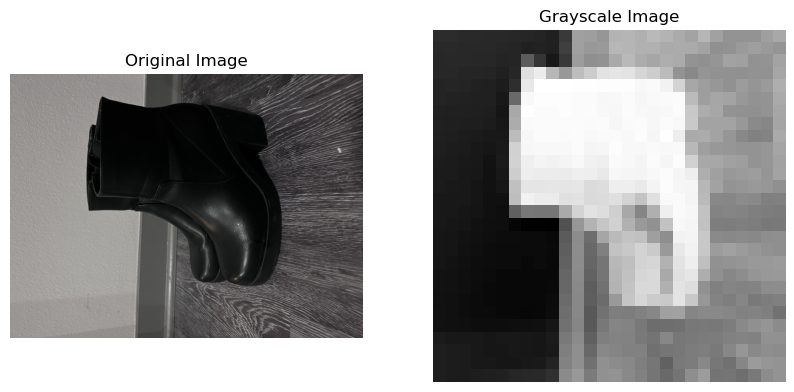

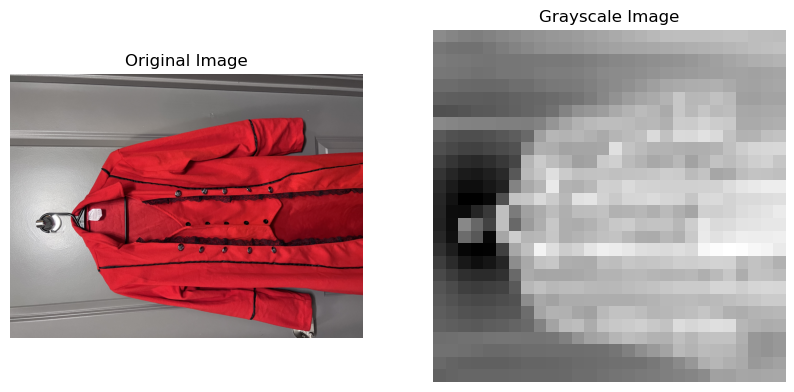

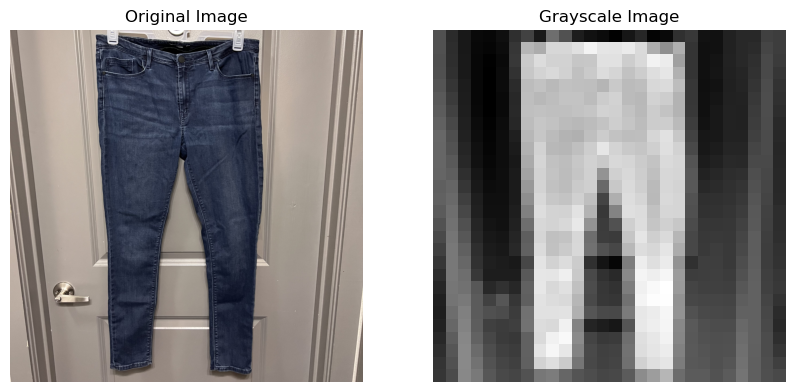

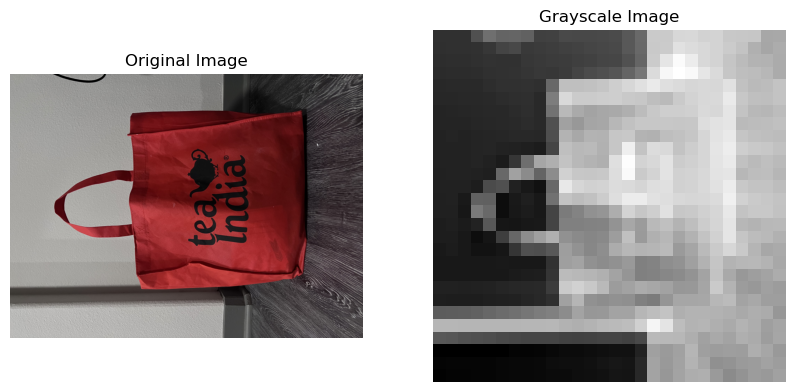

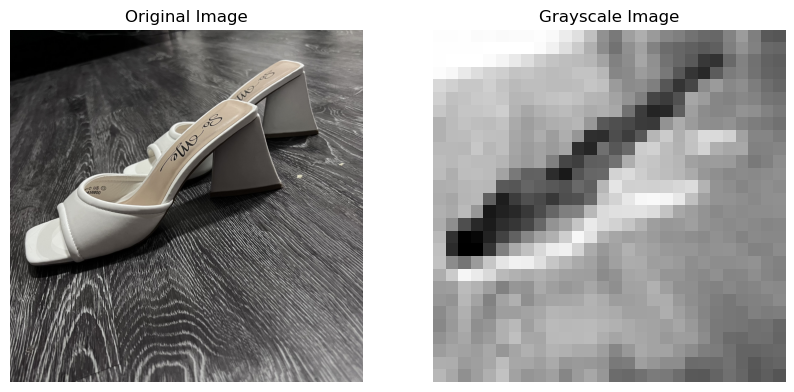

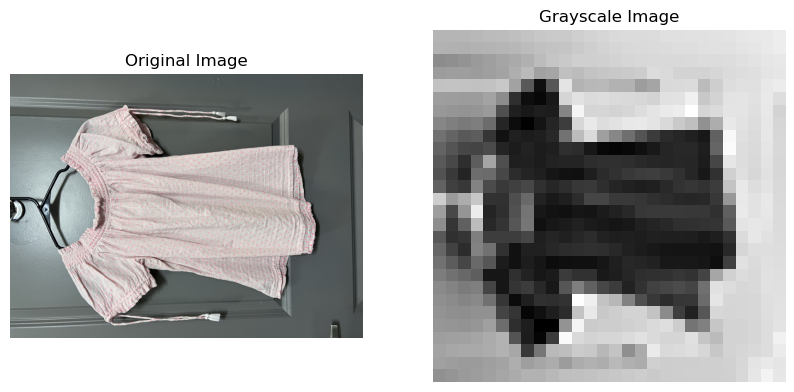

In [80]:
from PIL import Image
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize lists to store the original and flattened images
original_images = []
flattened_images = []

# Process each image in the specified folder
for filename in glob.glob('C:/Users/manug/OneDrive/Desktop/DataScience/Resized//*.JPG'):
    img = Image.open(filename)
    original_images.append(img)  # Store the original image
    # Resize the image to 28x28 (or the input size of your model)
    image_resized = img.resize((28, 28))


    # Convert to grayscale
    grayscale_img = np.mean(image_resized, axis=2)
    
    # Flatten the grayscale image and append to the list
    flattened_images.append(grayscale_img.flatten())

# Create a DataFrame from the list of flattened images
df_test_images = pd.DataFrame(flattened_images)
labels = [9, 4, 1, 8, 5, 0]
df_test_images['label'] = labels

# Display the original and grayscale images side by side
for i in range(len(original_images)):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    # Original image
    axs[0].imshow(original_images[i])
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # Grayscale image
    axs[1].imshow(df_test_images.iloc[i, :-1].values.reshape(28, 28), cmap='binary')
    axs[1].set_title('Grayscale Image')
    axs[1].axis('off')
    
    plt.show()


In [81]:
df_test_images.shape

(6, 785)

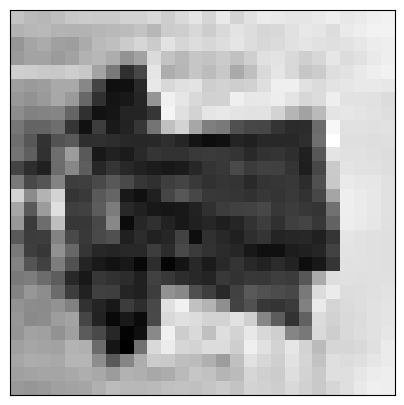

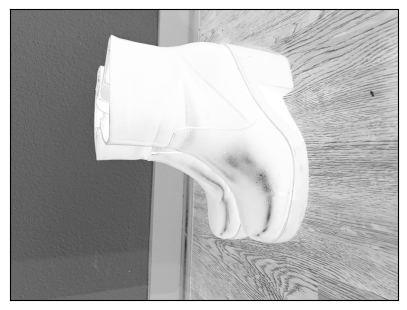

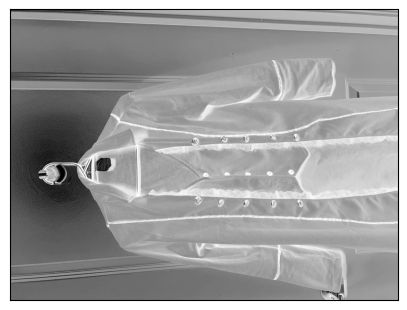

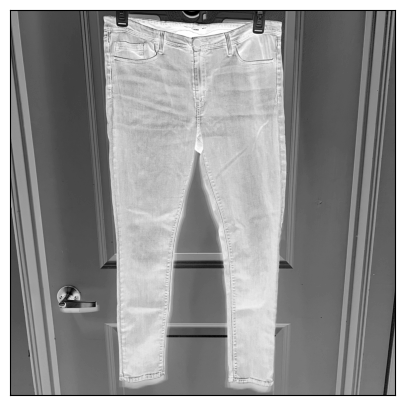

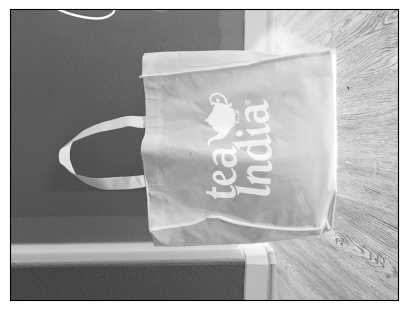

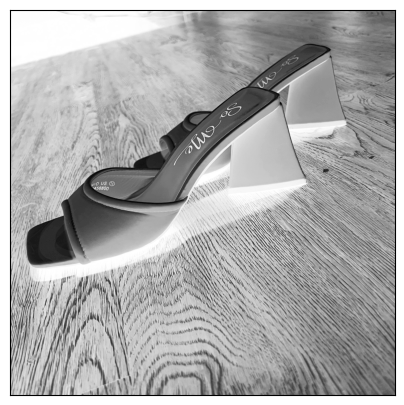

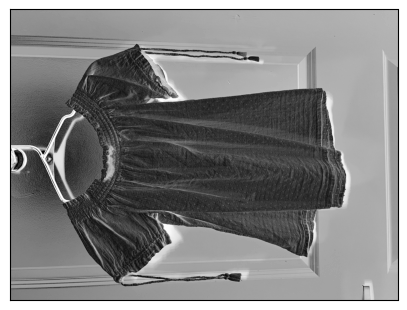

In [36]:
for filename in glob.glob('C:/Users/manug/OneDrive/Desktop/DataScience//*.JPG'):
   # print(filename)
    img = np.array(Image.open(filename))
    x=np.mean(img,axis=2)
    test_set.append(x)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(x,cmap='binary')
    ax.set(xticks=[], yticks=[])
    plt.show()

In [83]:
# Load the saved Random Forest model
RFC_Model_test = pickle.load(open('SVM_Model.pkl', 'rb'))
# Prepare the test dataset
# Remove the 'label' column to get the features only
X_test = df_test_images.drop('label', axis=1).values
y_test = df_test_images['label'].values
# Make predictions using the loaded model
y_pred = RFC_Model_test.predict(X_test)

# Evaluate the results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Out-of-sample Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Out-of-sample Accuracy: 16.67%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           8       0.17      1.00      0.29         1
           9       0.00      0.00      0.00         1

    accuracy                           0.17         6
   macro avg       0.03      0.17      0.05         6
weighted avg       0.03      0.17      0.05         6

Confusion Matrix:
[[0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]]


**Result Analysis:**
- The low out-of-sample accuracy of 16.67% and the classification report suggest that the model is not performing well on the test data. The confusion matrix shows that all predictions are classified as class 8, indicating a potential issue with how the test data is processed or with the distribution of the test data.

   - Potential Issues and Solutions
     -  Small Test Set Size:
         - The test set consists of only 6 samples. This is a very small sample size, which might not be representative of the overall performance. Consider using a larger test set for a more accurate evaluation.
         
      - Imbalanced Test Set:
         - The test set might be imbalanced, affecting the performance. Ensure that the test set has a representative distribution of all classes.
         
       - Feature Scaling:
          - If the model was trained with scaled features (e.g., using StandardScaler), make sure to apply the same scaling to the test set.
          
       - Model Re-training:
         - If the model was trained on a significantly different distribution of data, consider retraining the model with more representative data.
         
  - Steps to Troubleshoot
     - Verify Data Preparation:
        - Ensure that the test data is processed in the same way as the training data.
        
      - Check for Scaling:
         - If feature scaling was used during training, apply the same scaler to the test data.
         
       - Increase Test Set Size:
         - Evaluate the model on a larger test set to get a more accurate measure of performance.
         
       - Review Training Data:

         - Ensure the training data is representative of the test data.

### Overall Model Comparison and Analysis

#### Model Performances:

**Logistic Regression:**
- **In-sample Accuracy:** 86.07%
- **Out-of-sample Accuracy:** 85.49%
- **AUC Scores:** High AUC scores for most classes with a slightly lower performance for class 6.

**Support Vector Machine (SVM):**
- **Out-of-sample Accuracy:** 86.57%
- **AUC Scores:** High AUC scores across most classes, slightly better than Logistic Regression in several classes. Marginally better performance for class 6.

**Random Forest Classifier:**
- **In-sample Accuracy:** 88.25%
- **Out-of-sample Accuracy:** 86.03%
- **AUC Scores:** High AUC scores, particularly strong for classes 1, 5, 8, and 9. Slightly lower performance for class 6 compared to SVM.

**K-Nearest Neighbors (KNN):**
- **In-sample Accuracy:** 82.88%
- **Out-of-sample Accuracy:** 82.00%
- **AUC Scores:** Not provided, but accuracy suggests decent performance with potential challenges in high-dimensional space and computational cost.

#### Summary and Recommendations:

**Logistic Regression:**
- Provides a solid baseline with good overall performance and high interpretability. Suitable for quick insights and baseline comparisons.

**SVM:**
- Achieves the highest out-of-sample accuracy (86.57%) with strong AUC scores, making it a robust choice for distinguishing between most classes. Slightly better at handling class 6 compared to other models.

**Random Forest:**
- Exhibits the highest in-sample accuracy (88.25%) and strong out-of-sample performance. Excellent for capturing complex patterns and interactions, with the added benefit of feature importance insights.

**KNN:**
- Demonstrates decent performance with lower accuracy compared to other models. KNN's simplicity is balanced by its computational cost and sensitivity to high-dimensional data.

#### Overall Recommendation:

**Best Performance:**
- SVM and Random Forest models show the best overall performance, with SVM slightly leading in out-of-sample accuracy and better handling class 6.

**Balanced Choice:**
- Random Forest offers a good balance with high accuracy, robustness to overfitting, and feature importance insights.

For future work, consider further tuning hyperparameters and exploring advanced models like neural networks to potentially improve performance, especially for challenging classes like class 6.


In [87]:
import plotly.graph_objects as go
import numpy as np

# Data for visualization
models = ['Logistic Regression', 'SVM', 'Random Forest', 'KNN']
in_sample_accuracy = [86.07, 86.57, 88.25, 82.88]
out_of_sample_accuracy = [85.49, 86.57, 86.03, 82.00]
auc_scores = {
    'Logistic Regression': [0.906, 0.979, 0.885, 0.944, 0.904, 0.954, 0.791, 0.944, 0.975, 0.967],
    'SVM': [0.906, 0.979, 0.886, 0.945, 0.905, 0.955, 0.791, 0.945, 0.975, 0.967],
    'Random Forest': [0.897, 0.980, 0.882, 0.950, 0.897, 0.963, 0.765, 0.946, 0.980, 0.965],
}

# Highlight class 6 (index 6) as the one that didn't perform well
highlight_class_index = 6

# Plotting in-sample and out-of-sample accuracy
fig1 = go.Figure(data=[
    go.Bar(name='In-sample Accuracy', x=models, y=in_sample_accuracy, text=in_sample_accuracy, textposition='auto'),
    go.Bar(name='Out-of-sample Accuracy', x=models, y=out_of_sample_accuracy, text=out_of_sample_accuracy, textposition='auto')
])

# Change the bar mode
fig1.update_layout(barmode='group', title='Model Performance Comparison', xaxis_title='Models', yaxis_title='Accuracy (%)')

# Plotting AUC scores for each model with highlighting
fig2 = go.Figure()

for model, auc in auc_scores.items():
    colors = ['rgba(0, 123, 255, 0.5)' if i != highlight_class_index else 'rgba(255, 0, 0, 0.8)' for i in range(10)]
    fig2.add_trace(go.Scatter(x=list(range(1, 11)), y=auc, mode='lines+markers', name=model, marker=dict(color=colors)))

fig2.update_layout(title='AUC Score Comparison for Different Models', xaxis_title='Class', yaxis_title='AUC Score')

# Show the figures
fig1.show()
fig2.show()
